<a href="https://colab.research.google.com/github/oriolao/AbusiveLanguage/blob/master/FastHateSpeech_Word_Embedding_Text_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import  Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tqdm import tqdm
import matplotlib.pyplot as plt

print("TensorFlow Version:",tf.__version__)
print("Hub version: ",hub.__version__)
pd.set_option('display.max_colwidth',1000)

TensorFlow Version: 2.7.0
Hub version:  0.12.0


In [ ]:
from keras.layers import CuDNNGRU,CuDNNLSTM

In [ ]:
MAX_NUM_WORDS = 20000
MAX_LEN = 300

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.externals import joblib

import collections
import os
import pandas as pd 
import re
import _pickle as cPickle

from IPython.display import display
from collections import Counter
from collections import OrderedDict

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import sklearn
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
import pandas as pd 
import multiprocessing

In [ ]:
import gensim
from gensim.models import Word2Vec
from gensim.models.tfidfmodel import TfidfModel
from gensim.matutils import sparse2full
from gensim.corpora import Dictionary

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, LSTM, Dense, Activation, Dropout, Masking, Embedding,SpatialDropout1D
from tensorflow.keras.layers import Embedding, Bidirectional
#from keras.layers import CuDNNGRU,CuDNNLSTM
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, GlobalMaxPooling1D

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from keras.utils.np_utils import to_categorical

from sklearn.metrics import log_loss, accuracy_score
from sklearn.metrics import confusion_matrix
import re

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Fast_N-Gram.csv to Fast_N-Gram.csv


In [ ]:
# import io
FastNgram = "Fast_N-Gram.csv"
df = pd.read_csv(FastNgram, encoding='ISO-8859-1', header=0)
XFast = pd.DataFrame(data=df, columns=['Tweet', 'Class'])
XFast.head()

,Tweet,Class
0,"Orania,the whites-only town did the unfathomable in 2019 Elections: EFF secure 3.73% of the vote in Orania None of us expected this one: There was a...",1
1,"Apart from maybe one small assessment of hers I disagree with (with regards Orania), this is an incredible opinion piece from Helen Zille and she hits many nails right on their heads . Everyone should read it!!! RT @dailymaverick: OPINIONISTA: From the Inside: The DA and the ANC took a knock  both require some soul-searching By Helen Zille @helenzille",1
2,Did #Orania participate on #Elections2019 ?,1
3,#DateMyFamily No wonder he's single coz his attitude is a TTO. He'll get a sbanxa girl or e Orania called Desperate van M'sunu,2
4,The EFF in the Northern Cape says it is unacceptable to allow areas like Orania to be exclusive to a particular race group. The EFF bussed about 50 supporters to Orania on May eighth and 21 of them voted for the party in Orania. #sabcnews,1


In [ ]:
XFast.shape

(14896, 2)

In [ ]:
import collections
c = collections.Counter(XFast.Class.values)
c

Counter({1: 13238, 2: 1290, 3: 368})

In [ ]:
import sklearn
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

# Initialize the stopwords
stoplist = stopwords.words('english')
print(stoplist)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
Lemmatizer = WordNetLemmatizer()
tokenizer= TweetTokenizer()
XFast['Tweet'] = XFast['Tweet'].replace('[^a-zA-Z ]', '', regex=True)
XF = XFast.apply(lambda x: x.astype(str).str.lower())
def lemmatize_text(Tweet):
    return [Lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(Tweet) if not w in set(stopwords.words('english'))]
XF['Tweet']=XF.Tweet.apply(lemmatize_text)
fast1= XF['Tweet']
fast1

0                                                                                                                                                                        [oraniathe, whitesonly, town, unfathomable, election, eff, secure, vote, orania, none, u, expected, one]
1        [apart, maybe, one, small, assessment, disagree, regard, orania, incredible, opinion, piece, helen, zille, hit, many, nail, right, head, everyone, read, rt, dailymaverick, opinionista, inside, da, anc, took, knock, require, soulsearching, helen, zille, helenzille]
2                                                                                                                                                                                                                                                 [orania, participate, election]
3                                                                                                                                                       [datemyfamily, wonder, he,

**Load** **Additional** **Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving New_Text_Generated_1.csv to New_Text_Generated_1.csv


In [ ]:
# import io
FastNgram2 = "New_Text_Generated_1.csv"
df2 = pd.read_csv(FastNgram2, encoding='ISO-8859-1', header=0)
XFast2 = pd.DataFrame(data=df2, columns=['Tweet', 'Class'])
XFast2.head()

,Tweet,Class
0,"We can share votes, the constitution and education, BUT not Land and resources. We are united in democracy ,BUT unequal. It was the flag, Clifton, expropriation, BEE, price fixing, racial prejudice in private sector n sports, hate of Mam Winnie, now Land or Death. Rhaa whites. "" Murda Gang bitch its Gang Land """,2
1,"I gotta stay humble, thats why i fuck wit da realest i swear i put that on the bible. You stuck in ya feelins, say im fuckin on ya bitch man u shoulda never ever wifed her, thats worda my mother, if a nigga take my bitch fuck it imma find another lover, we flexed on eachother "" is that ya bitch """,2
2,"No thanks for Helen. She will not survive at UCT especially after hero-worshipping colonialism #UCT #uctvc #ANC #DAmeeting #EFF RT @PossumCT: @JJ_Stellies Zille no longer holds a formal political position and it would be an honour for UCT to be represented by such an upstanding person. In contrast, the less said about Malema (political position or not) the better. ""@angelenagoley: 10 sex positions http://t.co/nt3PABMWsm http://t.co/JmHZ8Sczf0""naw this what u call fucking the soul outta bitch &#128557",2
3,"Man this shit getting outta hand and the police wonder why black people dont fuck wit them cuss shit like this be unnecessary RT @TalbertSwan: St Ann Mo cops pulled a car over on a traffic violation, said the PASSENGER didnt comply, refusing to raise his hands (A LIE), unlock the door or open the window (HE COULDNT BECAUSE CAR CRASHED ON HIS SIDE). He was released with NO CHARGES. Another day being Black in America. ""I prolly leave up out this bitch with my cups in my hand and yo hand in my other hand.""",2
4,and now you're attacking yet another strawman because you are a weak little boy trying to play a man's game-- argument for the sake of argument-- against a woman and LOSING congratulations o mighty slayer of scarecrows your butterknife wit can cut through straw RT @ipliskin_Ltjg: @SpitefulDoll The guy I argued with wasn't in the media. He was just some pervy dude. And he wasn't the only one. He was just the only one I interacted with. I'm sorry if you honestly don't think gaming has a douchebag sexist problem. But I'm happy you never encounter it. 99 problems but a bitch ain't one,2


In [ ]:
import collections
c = collections.Counter(XFast2.Class.values)
c

Counter({2: 370, 3: 470})

In [ ]:
XFast2['Tweet'] = XFast2['Tweet'].replace('[^a-zA-Z ]', '', regex=True)
XF2 = XFast2.apply(lambda x: x.astype(str).str.lower())
def lemmatize_text(Tweet):
    return [Lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(Tweet) if not w in set(stopwords.words('english'))]
XF2['Tweet']=XF2.Tweet.apply(lemmatize_text)
fast2= XF2['Tweet']
fast2

0                                                                                                                                                                                   [share, vote, constitution, education, land, resource, united, democracy, unequal, flag, clifton, expropriation, bee, price, fixing, racial, prejudice, private, sector, n, sport, hate, mam, winnie, land, death, rhaa, white, murda, gang, bitch, gang, land]
1                                                                                                                                                                            [gotta, stay, humble, thats, fuck, wit, da, realest, swear, put, bible, stuck, ya, feelins, say, im, fuckin, ya, bitch, man, u, shoulda, never, ever, wifed, thats, worda, mother, nigga, take, bitch, fuck, imma, find, another, lover, flexed, eachother, ya, bitch]
2                                      [thanks, helen, survive, uct, especially, heroworshipping, colonialism, uct, uctvc, anc, 

In [ ]:
y2 = XFast2['Class']

**Fast Hate Speech Continue**

In [ ]:
fas1 = [' '.join(x) for x in fast1]
fas1

['oraniathe whitesonly town unfathomable election eff secure vote orania none u expected one',
 'apart maybe one small assessment disagree regard orania incredible opinion piece helen zille hit many nail right head everyone read rt dailymaverick opinionista inside da anc took knock require soulsearching helen zille helenzille',
 'orania participate election',
 'datemyfamily wonder he single coz attitude tto hell get sbanxa girl e orania called desperate van msunu',
 'eff northern cape say unacceptable allow area like orania exclusive particular race group eff bussed supporter orania may eighth voted party orania sabcnews',
 'support effsouthafrica one voting district doesnt sound like amazing feat take new meaning knowing party saw support whitesonly settlement oraniahomeland election',
 'special resident orania much free airtime people interesting south african medium tiring',
 'racist really want preferential treatment admission government school honestlyfampk right tax must fk orani

In [ ]:
y1 = XFast['Class']

In [ ]:
c = collections.Counter(y1)
c

Counter({1: 13238, 2: 1290, 3: 368})

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(fas1, y1, test_size=0.25, random_state=0)

In [ ]:
Xtrain[0]

'celebspick indie film watch summer via httweets'

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(Xtrain)

In [ ]:
train_sequences = tokenizer.texts_to_sequences(Xtrain)
test_sequences = tokenizer.texts_to_sequences(Xtest)

In [ ]:
pad_seq_train_word = pad_sequences(train_sequences,maxlen=MAX_LEN)
pad_seq_test_word = pad_sequences(test_sequences,maxlen=MAX_LEN)

In [ ]:
pad_seq_train_word.shape

(11172, 300)

In [ ]:
sm=SMOTE()
sm_train_word, sm_ytrain_word = sm.fit_sample(pad_seq_train_word, Ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
sm_train_word.shape

(29838, 300)

In [ ]:
sm_ytrain_word.shape

(29838,)

**Merge Array**

In [ ]:
fast1.shape

(14896,)

In [ ]:
fast2.shape

(840,)

In [ ]:
fast1_df = pd.DataFrame(fast1)
fast1_df

,Tweet
0,"[oraniathe, whitesonly, town, unfathomable, election, eff, secure, vote, orania, none, u, expected, one]"
1,"[apart, maybe, one, small, assessment, disagree, regard, orania, incredible, opinion, piece, helen, zille, hit, many, nail, right, head, everyone, read, rt, dailymaverick, opinionista, inside, da, anc, took, knock, require, soulsearching, helen, zille, helenzille]"
2,"[orania, participate, election]"
3,"[datemyfamily, wonder, he, single, coz, attitude, tto, hell, get, sbanxa, girl, e, orania, called, desperate, van, msunu]"
4,"[eff, northern, cape, say, unacceptable, allow, area, like, orania, exclusive, particular, race, group, eff, bussed, supporter, orania, may, eighth, voted, party, orania, sabcnews]"
...,...
14891,"[favoritefemalerapper, rapper, rapstress, singer, femcee, unsigned, artist, model, hiphop, femalerapper, lyricist, unsignedhype, indie, independentartist, indienation, underground, undergroundmusic]"
14892,"[presidentella, favoritefemalerapper, rapper, rapstress, singer, femcee, unsigned, artist, model, hiphop, femalerapper, lyricist, unsignedhype, indie, independentartist, indienation, underground]"
14893,"[rt, sentletse, wonder, many, vote, blf, expecting, shocked, even, breathing, human, decided, waste, energy, vote, mob, nyaopists]"
14894,"[racine, wisconsin, indie, artist, ctarxan, c, hush, thc, thehustlecontinue, soundcloud, soundart, music, rapmusic, like, trending, bar, viral, soundcloud, midwestmusic, jet]"


In [ ]:
fast2_df = pd.DataFrame(fast2)
fast2_df

,Tweet
0,"[share, vote, constitution, education, land, resource, united, democracy, unequal, flag, clifton, expropriation, bee, price, fixing, racial, prejudice, private, sector, n, sport, hate, mam, winnie, land, death, rhaa, white, murda, gang, bitch, gang, land]"
1,"[gotta, stay, humble, thats, fuck, wit, da, realest, swear, put, bible, stuck, ya, feelins, say, im, fuckin, ya, bitch, man, u, shoulda, never, ever, wifed, thats, worda, mother, nigga, take, bitch, fuck, imma, find, another, lover, flexed, eachother, ya, bitch]"
2,"[thanks, helen, survive, uct, especially, heroworshipping, colonialism, uct, uctvc, anc, dameeting, eff, rt, possumct, jjstellies, zille, longer, hold, formal, political, position, would, honour, uct, represented, upstanding, person, contrast, le, said, malema, political, position, better, angelenagoley, sex, position, httptcontpabmwsm, httptcojmhzsczfnaw, u, call, fucking, soul, outta, bitch]"
3,"[man, shit, getting, outta, hand, police, wonder, black, people, dont, fuck, wit, cuss, shit, like, unnecessary, rt, talbertswan, st, ann, mo, cop, pulled, car, traffic, violation, said, passenger, didnt, comply, refusing, raise, hand, lie, unlock, door, open, window, couldnt, car, crashed, side, released, charge, another, day, black, america, prolly, leave, bitch, cup, hand, yo, hand, hand]"
4,"[youre, attacking, yet, another, strawman, weak, little, boy, trying, play, man, game, argument, sake, argument, woman, losing, congratulation, mighty, slayer, scarecrow, butterknife, wit, cut, straw, rt, ipliskinltjg, spitefuldoll, guy, argued, wasnt, medium, pervy, dude, wasnt, one, one, interacted, im, sorry, honestly, dont, think, gaming, douchebag, sexist, problem, im, happy, never, encounter, problem, bitch, aint, one]"
...,...
835,"[foolish, rt, sabcnewsonline, gogo, predicts, smooth, election, vumani, bo, fullview, sabcnews, sadecidaes, saelections, rt]"
836,"[foolish, rt, sabcnewsonline, gogo, predicts, smooth, election, vumani, bo, fullview, sabcnews, sadecidaes, saelections, rt, stepheeezyy, rt, nigga, bitch, naye]"
837,"[foolish, rt, sabcnewsonline, gogo, predicts, smooth, election, vumani, bo, fullview, sabcnews, sadecidaes, saelections, rt, obeyyreggie, stfu, hoe, rt]"
838,"[foolish, rt, sabcnewsonline, gogo, predicts, smooth, election, vumani, bo, fullview, sabcnews, sadecidaes, saelections, rt, tease, rt, youre, fag, httptcoolrdeqx]"


In [ ]:
fast = pd.concat([fast1_df, fast2_df], ignore_index=True)
fast

,Tweet
0,"[oraniathe, whitesonly, town, unfathomable, election, eff, secure, vote, orania, none, u, expected, one]"
1,"[apart, maybe, one, small, assessment, disagree, regard, orania, incredible, opinion, piece, helen, zille, hit, many, nail, right, head, everyone, read, rt, dailymaverick, opinionista, inside, da, anc, took, knock, require, soulsearching, helen, zille, helenzille]"
2,"[orania, participate, election]"
3,"[datemyfamily, wonder, he, single, coz, attitude, tto, hell, get, sbanxa, girl, e, orania, called, desperate, van, msunu]"
4,"[eff, northern, cape, say, unacceptable, allow, area, like, orania, exclusive, particular, race, group, eff, bussed, supporter, orania, may, eighth, voted, party, orania, sabcnews]"
...,...
15731,"[foolish, rt, sabcnewsonline, gogo, predicts, smooth, election, vumani, bo, fullview, sabcnews, sadecidaes, saelections, rt]"
15732,"[foolish, rt, sabcnewsonline, gogo, predicts, smooth, election, vumani, bo, fullview, sabcnews, sadecidaes, saelections, rt, stepheeezyy, rt, nigga, bitch, naye]"
15733,"[foolish, rt, sabcnewsonline, gogo, predicts, smooth, election, vumani, bo, fullview, sabcnews, sadecidaes, saelections, rt, obeyyreggie, stfu, hoe, rt]"
15734,"[foolish, rt, sabcnewsonline, gogo, predicts, smooth, election, vumani, bo, fullview, sabcnews, sadecidaes, saelections, rt, tease, rt, youre, fag, httptcoolrdeqx]"


In [ ]:
fastlist=fast['Tweet'].values.tolist()

In [ ]:
fastlist

[['oraniathe',
  'whitesonly',
  'town',
  'unfathomable',
  'election',
  'eff',
  'secure',
  'vote',
  'orania',
  'none',
  'u',
  'expected',
  'one'],
 ['apart',
  'maybe',
  'one',
  'small',
  'assessment',
  'disagree',
  'regard',
  'orania',
  'incredible',
  'opinion',
  'piece',
  'helen',
  'zille',
  'hit',
  'many',
  'nail',
  'right',
  'head',
  'everyone',
  'read',
  'rt',
  'dailymaverick',
  'opinionista',
  'inside',
  'da',
  'anc',
  'took',
  'knock',
  'require',
  'soulsearching',
  'helen',
  'zille',
  'helenzille'],
 ['orania', 'participate', 'election'],
 ['datemyfamily',
  'wonder',
  'he',
  'single',
  'coz',
  'attitude',
  'tto',
  'hell',
  'get',
  'sbanxa',
  'girl',
  'e',
  'orania',
  'called',
  'desperate',
  'van',
  'msunu'],
 ['eff',
  'northern',
  'cape',
  'say',
  'unacceptable',
  'allow',
  'area',
  'like',
  'orania',
  'exclusive',
  'particular',
  'race',
  'group',
  'eff',
  'bussed',
  'supporter',
  'orania',
  'may',
  'e

In [ ]:
frames_y = [y1,y2]

In [ ]:
y = pd.concat([y1, y2], ignore_index=True)
y

0        1
1        1
2        1
3        2
4        1
        ..
15731    3
15732    3
15733    3
15734    3
15735    3
Name: Class, Length: 15736, dtype: int64

In [ ]:
ylist=y.values.tolist()

**Skipgram** **Word2Vec**

In [ ]:
LabeledSentence = gensim.models.doc2vec.LabeledSentence

In [ ]:
def labelizeTweets(tweets, label_type):
    labelized1=[]
    for i,v in enumerate(tweets):
        label1 = '%s_%s'%(label_type,i)
        labelized1.append(LabeledSentence(v,[label1]))
    return labelized1

In [ ]:
FastW1_train = labelizeTweets(fast1, 'TRAIN')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  """


In [ ]:
FastW1_train[0]

LabeledSentence(words=['oraniathe', 'whitesonly', 'town', 'unfathomable', 'election', 'eff', 'secure', 'vote', 'orania', 'none', 'u', 'expected', 'one'], tags=['TRAIN_0'])

In [ ]:
#lets train word2vec only on training dataset, same test_size and random_state
w2v_X_train, w2v_X_test, w2v_y_train, w2v_y_test = train_test_split(FastW1_train, y1, test_size=0.25, random_state=0)

In [ ]:
w2v_X_train

[LabeledSentence(words=['celebspick', 'indie', 'film', 'watch', 'summer', 'via', 'httweets'], tags=['TRAIN_7343']),
 LabeledSentence(words=['man', 'coworker', 'quit', 'bc', 'supervisor', 'aint', 'approve', 'ptomood', 'af', 'cost', 'month', 'drive', 'car', 'ima', 'wit', 'as', 'still'], tags=['TRAIN_11534']),
 LabeledSentence(words=['youth', 'tut', 'soshanguve', 'ready', 'voteanc', 'progressive', 'youth', 'alliance', 'institution', 'higher', 'learning', 'championing', 'issue', 'ivoteanc', 'ivotedanc'], tags=['TRAIN_6461']),
 LabeledSentence(words=['yo', 'respect', 'tf', 'outta', 'kd', 'game', 'play', 'amp', 'cuz', 'play', 'high', 'level', 'amp', 'wit', 'hella', 'hearti', 'fuckin', 'hate', 'goin', 'g', 'tho', 'fuck', 'tht', 'man', 'tore', 'achilles', 'imma', 'hurt', 'bru', 'tht', 'shit', 'terrible', 'hope', 'he', 'ok', 'prayersupforkd'], tags=['TRAIN_11261']),
 LabeledSentence(words=['main', 'objective', 'last', 'go', 'good', 'rider', 'dont', 'worry', 'cooking', 'cook', 'rt', 'lindiwedee'

Enhanced Training Data

In [ ]:
def labelizeTweets1(tweets, label_type):
    labelized=[]
    for i,v in enumerate(tweets):
        label = '%s_%s'%(label_type,i)
        labelized.append(LabeledSentence(v,[label]))
    return labelized

In [ ]:
FastW_train = labelizeTweets1(fastlist, 'TRAIN')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  """


In [ ]:
FastW_train

[LabeledSentence(words=['oraniathe', 'whitesonly', 'town', 'unfathomable', 'election', 'eff', 'secure', 'vote', 'orania', 'none', 'u', 'expected', 'one'], tags=['TRAIN_0']),
 LabeledSentence(words=['apart', 'maybe', 'one', 'small', 'assessment', 'disagree', 'regard', 'orania', 'incredible', 'opinion', 'piece', 'helen', 'zille', 'hit', 'many', 'nail', 'right', 'head', 'everyone', 'read', 'rt', 'dailymaverick', 'opinionista', 'inside', 'da', 'anc', 'took', 'knock', 'require', 'soulsearching', 'helen', 'zille', 'helenzille'], tags=['TRAIN_1']),
 LabeledSentence(words=['orania', 'participate', 'election'], tags=['TRAIN_2']),
 LabeledSentence(words=['datemyfamily', 'wonder', 'he', 'single', 'coz', 'attitude', 'tto', 'hell', 'get', 'sbanxa', 'girl', 'e', 'orania', 'called', 'desperate', 'van', 'msunu'], tags=['TRAIN_3']),
 LabeledSentence(words=['eff', 'northern', 'cape', 'say', 'unacceptable', 'allow', 'area', 'like', 'orania', 'exclusive', 'particular', 'race', 'group', 'eff', 'bussed', 's

In [ ]:
#tweet_w2v3 = Word2Vec(min_count=1, size=300, workers=cores-1, window=10, sg=1) # sg=0 for cbow
#tweet_w2v3.build_vocab([x.words for x in FastW1_train])
#tweet_w2v3.train([x.words for x in FastW1_train], total_examples=tweet_w2v3.corpus_count, epochs=30)
   
location_sg3 = 'drive\\My Drive\\w2v_model_ug_sg3.model'
if os.path.exists(location_sg3):
    print('Found and load: {}'.format(location_sg3))
    tweet_w2v3 = gensim.models.Word2Vec.load(location_sg3)
else:
    print('{} not found. training model'.format(location_sg3))
    tweet_w2v3_E = Word2Vec(min_count=1, size=300, workers=8, window=10, sg=1) # sg=0 for cbow
    tweet_w2v3_E.build_vocab([x.words for x in FastW_train])
    tweet_w2v3_E.train([x.words for x in FastW_train], total_examples=tweet_w2v3_E.corpus_count, epochs=30)

    print('Model done training. Saving to disk for re-use later on.')
    tweet_w2v3_E.save(location_sg3)

drive\My Drive\w2v_model_ug_sg3.model not found. training model
Model done training. Saving to disk for re-use later on.


In [ ]:
def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1,size))
    count = 0
    for word in tokens:
        try:
            vec += tweet_w2v3_E[word].reshape((1,size))
            count += 1
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

In [ ]:
#train_w2v =  np.concatenate([buildWordVector(z, 300) for z in map(lambda x: x.words, FastW1_train))]
train_w2v =  np.concatenate([buildWordVector(z, 300) for z in map(lambda x: x.words, FastW_train)])
train_w2v = scale(train_w2v)

test_w2v =  np.concatenate([buildWordVector(z, 300) for z in map(lambda x: x.words, w2v_X_test)])
test_w2v = scale(test_w2v)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
train_w2v[0][0:10]

array([-1.36848978, -0.57043833, -0.03114363, -0.25019804,  0.04025038,
        0.91065038, -0.08073103,  1.15475331,  0.22090666, -0.13946683])

In [ ]:
train_w2v.shape

(15736, 300)

In [ ]:
test_w2v.shape

(3724, 300)

In [ ]:
def get_min_value_train():
    min_values = []
    for i in range(0, len(train_w2v)):
        min_value = min(train_w2v[i])
        min_values.append(min_value)

    return min(min_values)


a_train = get_min_value_train()
a_train_Abs = abs(a_train)
a_train_trans = train_w2v + a_train_Abs
len(a_train_trans)

15736

In [ ]:
def get_min_value_test():
    min_values = []
    for i in range(0, len(test_w2v)):
        min_value = min(test_w2v[i])
        min_values.append(min_value)

    return min(min_values)


a_test = get_min_value_test()
a_test_Abs = abs(a_test)
a_test_trans = test_w2v + a_test_Abs
len(a_test_trans)

3724

In [ ]:
sm = SMOTE()

w2v_sm_X_train, w2v_sm_y_train = sm.fit_sample(a_train_trans, y)
w2v_X_test, w2v_y_test = a_test_trans.copy(), w2v_y_test.copy()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
batch_size = 64
nb_epochs = 100
NO_CLASSES = 3
embed_dim = 128
#MAX_NUM_WORDS = 20000

In [ ]:
#def train_model(model, model_name, X, Y):
def train_model(model, model_name, Word2Vec_X_Train, Word2Vec_X_Test, Word2Vec_y_Train, Word2Vec_y_Test):
    
    # By default, any change in the performance measure, no matter how fractional, will be considered an improvement. 
    # You may want to consider an improvement that is a specific increment, such as 1 unit for mean squared error or 0.01% for accuracy. 
    # This can be specified via the ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ¢ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂmin_deltaÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ¢ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ argument.
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001)
    mc = ModelCheckpoint('D:\\Data\\Oluwafemi\\'+model_name+'.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

    X_train = Word2Vec_X_Train.copy()
    Y_train = Word2Vec_y_Train.copy()
    X_test  = Word2Vec_X_Test.copy()
    Y_test  = Word2Vec_y_Test.copy()
    
    print(X_train.shape, Y_train.shape)
    print(X_test.shape, Y_test.shape)
    
    # Fit the model
    estimator=model.fit(X_train, Y_train,
                        batch_size=batch_size,
                        shuffle=True,
                        epochs=nb_epochs,
                        verbose=1,
                        validation_split=0.1,
                        callbacks=[es, mc])

    scores = model.evaluate(X_test, Y_test, verbose=2)
    print("Accuracy: %.2f%%" % (scores[1]*100))

    output_test = model.predict(X_test)
    final_pred = np.argmax(output_test, axis=1)
    org_y_label = [np.where(r==1)[0][0] for r in Y_test]
    print(final_pred) 

    print('')
    #print(org_y_label)
    results = confusion_matrix(org_y_label, final_pred)
    
    print(results)
    
    #Compute precision, recall, F-measure and support for each class
    #  average='macro'
    #  Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
    #  The support is the number of occurrences of each class in y_true.
    
    precisions, recall, f1_score, true_sum = metrics.precision_recall_fscore_support(org_y_label, final_pred, average='macro')
    
    print('')    
    print('Classify NN Precision = %0.3f (STD +/- %0.2f)' % (np.mean(precisions), np.std(precisions) * 2)) 
    print('Classify NN Recall    = %0.3f (STD +/- %0.2f)' % (np.mean(recall), np.std(recall) * 2)) 
    print('Classify NN F1 Score  = %0.3f (STD +/- %0.2f)' % (np.mean(f1_score), np.std(f1_score) * 2)) 
    print('Classify NN y_true    = ', true_sum) 
    
    pred_indices = np.argmax(output_test, axis=1)
    classes = np.array(range(0,NO_CLASSES))
    preds = classes[pred_indices]
    
    print('')
    print('Log loss: {}'.format(log_loss(classes[np.argmax(Y_test, axis=1)], output_test)))
    print('Accuracy: {}'.format(accuracy_score(classes[np.argmax(Y_test, axis=1)], preds)))
    
    # summarize history for accuracy
    plt.plot(estimator.history['acc'])
    plt.plot(estimator.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(estimator.history['loss'])
    plt.plot(estimator.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()

In [ ]:
def mlp_model(X):
    
    tf.keras.backend.clear_session()
        
    print('Building model...')
    model = Sequential()
    model.add(Dense(512, input_shape=(X.shape[1],)))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(NO_CLASSES))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()
    
    return model

In [ ]:
def CNN(X):
    tf.keras.backend.clear_session()
    LENGTH=X.shape[1]
    max_features = MAX_NUM_WORDS
    # Convolution
    filters = 128
    kernel_size = 5
    DEPTH=128
    model = Sequential()
    model.add(Embedding(max_features, DEPTH, input_length=LENGTH, trainable=True))
    model.add(Conv1D(DEPTH, kernel_size, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(NO_CLASSES, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()
    
    return model    
    

In [ ]:
def basic_LSTM():
    
    tf.keras.backend.clear_session()
    CuDNNLSTM = tf.compat.v1.keras.layers.CuDNNLSTM
    
    max_features = MAX_NUM_WORDS
    
    print('Build model...')
    model = Sequential()
    model.add(Embedding(max_features, 128, trainable = False))
    
    print("Using GPU")
    model.add(CuDNNLSTM(128)) # for GPU
    # Recurrent dropout is not implemented in cuDNN RNN ops. At the cuDNN level. So we can't have it in Keras.
    model.add(Dense(NO_CLASSES, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()

    return model

In [ ]:
def basic_GRU():
    
    tf.keras.backend.clear_session()
    CuDNNGRU = tf.compat.v1.keras.layers.CuDNNGRU
    
    max_features = MAX_NUM_WORDS
    
    print('Build model...')
    model = Sequential()
    model.add(Embedding(max_features, 128, trainable = True))
    print("Using GPU")
    model.add(CuDNNGRU(128)) # for GPU    
    model.add(Dense(NO_CLASSES, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()

    return model

In [ ]:
# DoubleCNN
def double_cnn(X):
    
    tf.keras.backend.clear_session()
    
    LENGTH=X.shape[1]
    
    # Convolution
    filters = 128
    kernel_size = 5
    DEPTH=128
    
    print('Build model...')
    model = Sequential()
    model.add(Embedding(MAX_NUM_WORDS, DEPTH, input_length = LENGTH, trainable = True))
    model.add(Conv1D(DEPTH, kernel_size, activation='relu'))
    model.add(MaxPooling1D(5))
    model.add(Conv1D(DEPTH, kernel_size, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(NO_CLASSES, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()
    
    return model    

In [ ]:

#Double LSTM
def stack_LSTM(X):
    
    tf.keras.backend.clear_session()
    CuDNNLSTM = tf.compat.v1.keras.layers.CuDNNLSTM
    
    LENGTH=X.shape[1]
    max_features = MAX_NUM_WORDS
    
    print('Build model...')
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length = LENGTH, trainable = True))
    
    if len(gpu) > 0:
        print("Using GPU")
        model.add(CuDNNLSTM(128, return_sequences=True)) # for GPU
        model.add(CuDNNLSTM(128)) 
    else:        
        print("Using CPU")
        model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)) # for CPU
        model.add(LSTM(128))  
        
    model.add(Dense(NO_CLASSES, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()

    return model

In [ ]:
def stack_GRU(X):
    
    tf.keras.backend.clear_session()
    CuDNNGRU = tf.compat.v1.keras.layers.CuDNNGRU
    
    LENGTH = X.shape[1]
    max_features = MAX_NUM_WORDS
    
    print('Build model...')
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length = LENGTH, trainable = True))
    if len(gpu) > 0:
        print("Using GPU")
        model.add(CuDNNGRU(128, return_sequences = True)) # for GPU
        model.add(CuDNNGRU(128))   
        # Recurrent dropout is not implemented in cuDNN RNN ops. At the cuDNN level. So we can't have it in Keras.
    else:        
        print("Using CPU")
        model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2, return_sequences = True)) # for CPU
        model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2)) 
        
    model.add(Dense(NO_CLASSES, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()

    return model

In [ ]:
def bi_LSTM(X):
    
    tf.keras.backend.clear_session()
    CuDNNLSTM = tf.compat.v1.keras.layers.CuDNNLSTM
    
    LENGTH = X.shape[1]
    max_features = MAX_NUM_WORDS
    LSTM_SIZE = 64
    
    print('Build model...')
    model = Sequential()
    model.add(Embedding(max_features, LSTM_SIZE, input_length = LENGTH, trainable = True))
    
    print("Using GPU")
    model.add(Bidirectional(CuDNNLSTM(LSTM_SIZE))) # for GPU
    # Recurrent dropout is not implemented in cuDNN RNN ops. At the cuDNN level. So we can't have it in Keras.
    
    model.add(Dense(NO_CLASSES, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()

    return model

In [ ]:
def bi_GRU(X):
    
    tf.keras.backend.clear_session()
    CuDNNGRU = tf.compat.v1.keras.layers.CuDNNGRU
    
    LENGTH = X.shape[1]
    max_features = MAX_NUM_WORDS
    LSTM_SIZE = 64
    
    print('Build model...')
    model = Sequential()
    model.add(Embedding(max_features,LSTM_SIZE, input_length = LENGTH, trainable = True))
    
    print("Using GPU")
    model.add(Bidirectional(CuDNNGRU(LSTM_SIZE))) # for GPU
    # Recurrent dropout is not implemented in cuDNN RNN ops. At the cuDNN level. So we can't have it in Keras.
           
   
    model.add(Dense(NO_CLASSES, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()

    return model
def CNN_LSTM(X):
   
    tf.keras.backend.clear_session()

    LENGTH = X.shape[1]
    DEPTH = 128
    max_features = MAX_NUM_WORDS
    
    # Convolution
    kernel_size = 5
    filters = 64
    pool_size = 4
    
    print('Build model...')
    model = Sequential()
    model.add(Embedding(max_features, DEPTH, input_length = LENGTH, trainable = True))
    model.add(Conv1D(DEPTH,
                     kernel_size,
                     padding='valid',
                     activation='relu',
                     strides=1))
    model.add(MaxPooling1D(pool_size=pool_size)) 
    model.add(LSTM(DEPTH))
    model.add(Dense(NO_CLASSES, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()
    
    return model

In [ ]:
def CNN_GRU(X):

    tf.keras.backend.clear_session()
        
    LENGTH = X.shape[1]
    DEPTH = 128
    max_features = MAX_NUM_WORDS
    
    # Convolution
    kernel_size = 5
    pool_size = 4
        
    print('Build model...')
    model = Sequential()
    model.add(Embedding(max_features, DEPTH, input_length = LENGTH, trainable = True))
    model.add(Conv1D(DEPTH,
                     kernel_size,
                     padding='valid',
                     activation='relu',
                     strides=1))
    model.add(MaxPooling1D(pool_size=pool_size)) 
    model.add(GRU(DEPTH))
    model.add(Dense(NO_CLASSES, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()
    
    return model

In [ ]:
w2v_sm_X_train_df = pd.DataFrame(w2v_sm_X_train)
print(w2v_sm_X_train_df.shape)

w2v_X_test_df = pd.DataFrame(w2v_X_test)
print(w2v_X_test_df.shape)

(39714, 300)
(3724, 300)


In [ ]:
w2v_sm_y_train_df = pd.get_dummies(w2v_sm_y_train).values  # Convert categorical variable into dummy/indicator variables.
print(w2v_sm_y_train_df.shape)

w2v_y_test_df = pd.get_dummies(w2v_y_test).values  # Convert categorical variable into dummy/indicator variables.
print(w2v_y_test_df.shape)

(39714, 3)
(3724, 3)


In [ ]:
w2v_sm_X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,8.913026,9.711078,10.250373,10.031318,10.321767,11.192167,10.200785,11.436269,10.502423,10.142049,10.892066,9.987993,11.147349,9.808660,9.710382,12.088040,11.065792,10.424761,10.184760,10.118431,11.073696,10.973039,8.677309,10.499764,8.884912,10.439226,10.923419,10.103062,10.975419,9.984057,10.658532,9.774234,11.354596,9.339443,10.493893,9.109475,9.783351,10.616665,8.121705,9.162463,...,10.195411,11.629596,10.093970,10.560403,8.859409,9.886945,9.890503,10.084720,9.378456,10.597101,11.218979,10.484177,10.223514,10.755230,11.059961,10.580171,10.733974,9.141008,9.830377,9.857802,9.748942,10.054882,9.662013,10.956246,9.776391,10.352484,11.648269,10.379870,10.638082,10.450444,10.784947,9.913191,10.482958,9.194178,11.297206,10.343724,10.160707,11.519732,9.955882,12.019176
1,10.241951,11.048171,10.159140,10.385507,10.706264,10.840587,10.074271,8.979990,10.881898,9.495597,10.886472,10.081156,10.526804,10.472240,10.102673,11.196885,9.420659,9.611691,10.342867,10.624927,11.138787,10.498333,9.136225,9.535556,9.142983,10.015602,10.362216,11.423573,8.841210,9.522464,9.218016,10.306424,10.716736,10.668792,9.358586,10.021109,10.054295,10.284434,10.509418,9.819959,...,10.694388,10.975127,10.464162,11.362091,9.738594,9.877808,9.402531,10.272855,10.577273,11.033311,10.697676,9.902995,10.168213,9.677967,10.891542,9.537461,12.492600,10.336973,10.140009,9.601385,10.359634,11.188261,10.131604,11.021150,9.764831,10.480949,10.871657,10.052082,10.534632,10.177769,9.174251,10.323794,12.907560,9.588605,10.153989,10.669290,9.916606,10.947967,10.064198,10.081923
2,8.321551,8.069291,8.486330,10.504914,11.440859,9.733037,10.261136,11.136648,10.027198,9.258229,10.831706,7.213444,10.419968,9.664001,12.425441,9.351700,11.650773,9.634463,9.111429,10.295974,11.824059,11.738596,9.580478,10.206820,8.163729,12.044748,12.083502,9.503272,11.459571,8.306775,9.365355,9.345006,10.411070,10.877334,9.927548,7.557250,9.717479,11.957938,9.693358,9.039513,...,10.986301,10.651551,9.567467,9.189008,7.341541,8.775791,10.178990,9.023951,9.890214,11.039172,11.877663,9.343887,10.982362,10.632382,11.133035,9.425019,9.118810,9.249585,11.249673,9.300360,10.584337,10.617200,8.003064,11.192173,7.837876,10.514105,12.777733,11.217075,9.378887,10.980805,9.510645,10.908606,10.603580,8.464641,11.807589,10.048242,10.406854,12.480789,10.139385,9.934054
3,9.670069,10.517413,9.988389,9.212341,9.597448,9.268256,10.272635,9.245960,10.149606,9.577346,10.023307,9.655575,10.686559,10.587601,9.973088,9.763435,9.831649,11.207849,10.440244,12.172331,10.697878,10.240845,10.109585,11.560882,10.207563,9.281991,11.145940,9.000620,11.325661,12.440971,12.321202,9.212081,11.190833,11.668430,10.555126,10.684431,9.220920,10.226681,10.335248,9.778338,...,10.791856,11.737278,8.932024,9.422733,10.122913,8.315324,10.252236,10.527596,9.700983,10.923076,10.823025,10.751609,9.585459,9.954302,9.932187,10.787174,10.226661,9.890054,10.735564,10.532318,9.975394,8.469670,9.685438,10.732708,9.707469,10.414918,10.647337,10.967346,8.803831,10.403932,11.398705,10.083168,9.490222,10.429753,9.798174,10.058402,10.143761,9.901008,11.102323,11.128097
4,9.283253,9.674636,9.591994,10.141919,10.983287,10.136958,9.729336,12.031825,9.834545,10.401490,11.280038,10.442260,9.701028,9.448316,9.718407,10.867274,10.636555,9.558002,9.900297,10.220682,11.115629,11.930288,9.357791,9.638606,8.152156,9.902045,11.412896,9.508150,10.773513,8.775155,11.025995,8.995221,10.293007,10.252179,11.023389,10.564378,10.763665,10.519836,10.076757,9.135397,...,11.369978,11.346450,9.941539,10.564903,9.206020,10.294325,10.198124,10.577445,9.481390,10.510391,10.635146,10.681693,9.085043,10.746719,10.080011,10.525475,11.204652,8.410861,10.509885,8.531315,9.405949,10.062958,10.484662,11.625501,

In [ ]:
w2v_X_test_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,8.120211,7.258544,6.950596,7.839939,7.862154,7.829277,8.613982,7.767728,6.872914,8.638107,8.164975,7.635397,7.466873,7.412111,8.713295,7.535084,7.525644,7.478503,7.448217,7.355831,7.033666,7.219669,8.955859,7.631645,7.916279,8.460854,8.465577,8.693642,7.640856,7.969611,8.277781,8.989383,7.698940,8.748852,8.062926,7.616979,7.033586,8.485522,7.449371,7.207887,...,7.955828,8.066270,8.007313,7.807533,7.883242,8.773751,7.513569,7.697363,6.700258,8.693922,9.078037,7.122181,8.224321,7.497194,9.131471,7.886985,8.614335,7.642003,7.413937,7.875746,8.000609,7.909293,7.791901,7.483406,6.995578,8.076160,7.924791,8.536732,8.341593,7.440700,7.916852,7.165761,7.872572,8.485344,6.690788,6.902229,7.865720,8.607087,8.071368,7.447626
1,8.128288,8.486473,5.129381,5.934613,6.297394,6.681691,7.802433,7.590049,8.380517,6.392112,5.949675,8.422851,8.592125,7.842327,7.022308,6.376213,7.272044,7.087331,8.987886,6.782906,7.501770,6.209064,6.702289,8.535103,8.181540,7.034138,6.584653,7.069488,6.178058,6.527967,8.039061,8.480543,5.806484,8.972096,7.652490,8.271430,7.706552,7.070981,7.482069,8.485962,...,7.304201,7.360022,7.767098,8.648405,9.081181,6.580625,6.121826,8.290419,7.958138,6.810435,6.186403,6.763071,9.313159,7.921803,8.441917,8.059234,8.300401,8.453068,7.175840,7.347295,6.202962,7.819259,7.864640,8.789655,8.752544,6.807472,6.754112,6.445232,7.768952,5.463957,9.457974,9.364155,8.724231,8.268893,5.196441,7.837932,10.139735,7.016435,7.466797,8.567279
2,7.524140,8.793968,8.235444,7.074135,6.616313,8.373305,9.506572,7.093722,5.808871,7.689764,8.980579,7.737081,7.922421,7.257513,6.489139,7.332023,6.684512,8.740744,7.919921,7.150363,6.076594,7.162696,7.706805,7.652659,8.397473,7.697655,7.435347,8.279471,8.196396,7.807374,9.306499,8.138513,7.540874,7.638825,6.243461,7.990357,7.165899,8.644185,7.325599,8.312300,...,7.428234,7.148486,7.093851,8.530288,7.837529,8.130022,6.784535,8.135720,6.684328,9.443091,8.317471,6.425544,8.163986,8.501223,8.343209,8.416677,7.422371,7.563383,8.276051,8.415493,10.071425,7.310232,10.310503,7.910909,7.677461,8.251296,6.984288,9.121207,8.709013,8.168097,7.134549,6.211712,7.438422,8.110901,6.554847,7.350617,8.628964,7.577972,8.846436,8.037564
3,9.061176,5.841207,8.754658,5.679650,5.897288,6.921217,8.523754,6.603819,9.182192,8.390140,6.659303,4.333394,9.320944,4.136972,7.616919,6.092366,9.570975,9.594758,6.556362,8.269714,6.928423,7.077442,7.231541,8.970168,8.144180,8.077160,8.734713,6.394574,9.761689,9.612239,5.991731,8.835637,6.475217,8.806838,9.129583,7.288467,8.149780,7.664805,8.044102,7.238936,...,7.774236,8.958461,8.381431,7.333853,6.809765,7.633911,6.911395,8.757591,8.797291,8.562334,6.696986,9.337570,9.694049,9.267053,7.675789,8.743226,6.219300,7.299058,8.722166,7.511766,5.631942,6.861449,7.779165,9.588081,7.071845,9.656106,8.829175,5.544480,7.534684,6.152740,6.582339,6.067509,8.058816,8.899578,9.561957,6.577074,6.650559,9.043112,6.230311,5.258021
4,8.320742,9.373226,7.725208,8.805568,7.857048,9.307849,7.652525,8.579092,9.703886,7.427243,8.105684,9.817085,7.488760,8.847444,7.130781,8.554325,8.335381,8.631711,9.179632,8.136674,6.332952,6.428433,9.022613,10.008241,8.685611,6.924289,7.075501,8.394989,7.709795,8.915191,8.432666,7.234413,8.018186,7.198736,7.219687,7.518723,8.207895,7.104034,8.403832,7.685325,...,6.862983,6.909342,7.299028,6.967934,8.404142,8.134378,7.888589,7.442348,7.007176,6.949157,6.710338,7.938115,7.103593,7.489512,8.418456,6.697998,7.217308,8.505425,7.351432,6.956670,7.593174,7.767122,6.086938,9.167478,8.839062,7.262820,7.546957,8.010635,8.263923,7.876179,8.128025,9.947465,6.977722,8.999211,8.099073,9.184399,7.076695,7.757740,6.689074,9.484969


In [ ]:
c = collections.Counter(w2v_y_train)
c

Counter({1: 9946, 2: 943, 3: 283})

In [ ]:
c = collections.Counter(w2v_y_test)
c

Counter({1: 3292, 2: 347, 3: 85})

In [ ]:
w2v_sm_X_train_df = np.asarray(w2v_sm_X_train_df)
w2v_X_test_df = np.asarray(w2v_X_test_df)

w2v_sm_y_train_df = np.asarray(w2v_sm_y_train_df)
w2v_y_test_df = np.asarray(w2v_y_test_df)

In [ ]:
print(w2v_sm_X_train_df.shape)
print(w2v_X_test_df.shape)
print(w2v_sm_y_train_df.shape)
print(w2v_y_test_df.shape)

(39714, 300)
(3724, 300)
(39714, 3)
(3724, 3)


Building model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               154112    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
Total params: 155,651
Trainable params: 155,651
Non-trainable params: 0
_________________________________________________________________
(39714, 300) (39714, 3)
(3724, 300) (3724, 3)
Epoch 1/100
559/559 [==============================]

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


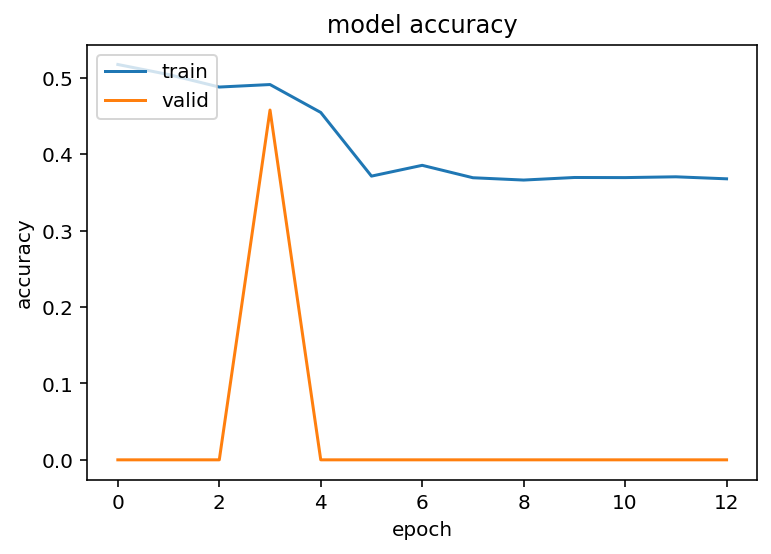

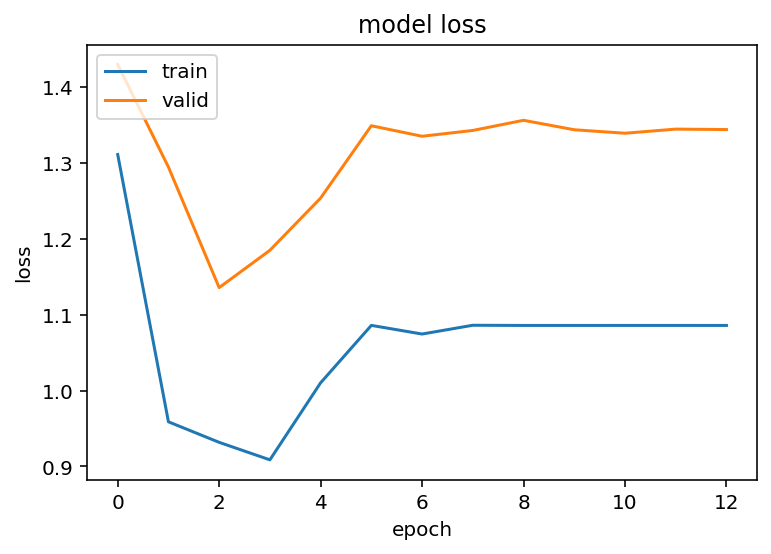

CPU times: user 28.9 s, sys: 4.94 s, total: 33.9 s
Wall time: 42.5 s


In [ ]:
%%time
np.set_printoptions(edgeitems=50000)
np.core.arrayprint._line_width = 50000
nn_model = mlp_model(w2v_sm_X_train_df)
train_model(nn_model, 'Word2Vec_MLP' ,w2v_sm_X_train_df, w2v_X_test_df, w2v_sm_y_train_df, w2v_y_test_df)
del nn_model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 128)          2560000   
_________________________________________________________________
conv1d (Conv1D)              (None, 296, 128)          82048     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 2,642,435
Trainable params: 2,642,435
Non-trainable params: 0
_________________________________________________________________
(39714, 300) (39714, 3)
(3724, 300) (3724, 3)
Epoch 1/100
559/559 [==============================] - 55s 47ms/step - loss: 0.9500 - acc: 0.5402 - val_loss: 0.9465 - val_acc: 0.5637

Epoch 00001: val_acc improved from -inf to 0.56370, saving mod

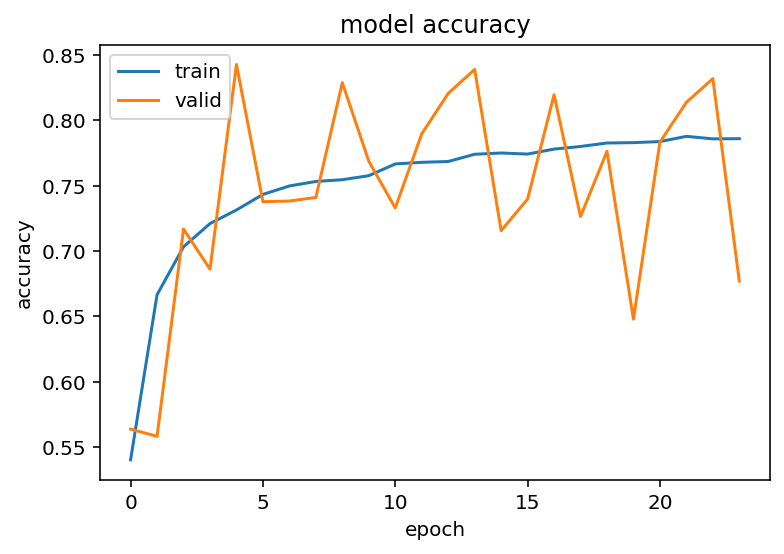

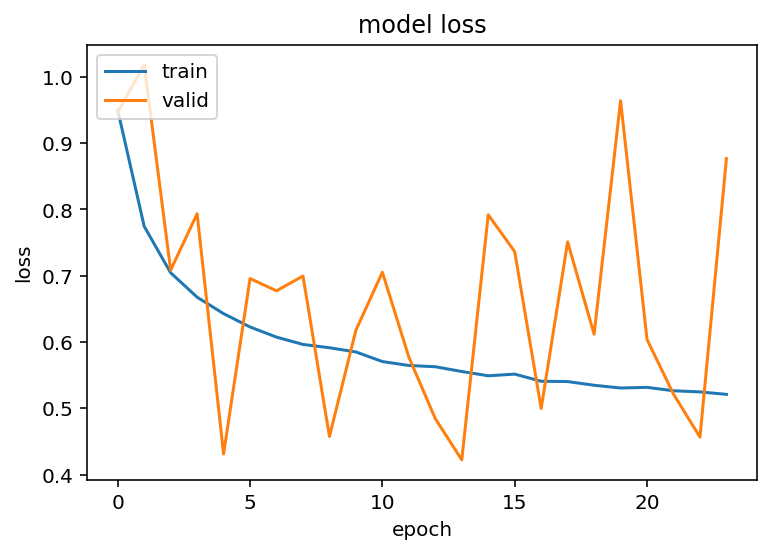

In [ ]:
cnn_model = CNN(w2v_sm_X_train_df)
train_model(cnn_model, 'Word2Vec_CNN' ,w2v_sm_X_train_df, w2v_X_test_df, w2v_sm_y_train_df, w2v_y_test_df)
del cnn_model

Build model...
Using GPU
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
cu_dnnlstm (CuDNNLSTM)       (None, 128)               132096    
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 2,692,483
Trainable params: 2,692,483
Non-trainable params: 0
_________________________________________________________________
(39714, 300) (39714, 3)
(3724, 300) (3724, 3)
Epoch 1/100
559/559 [==============================] - 34s 59ms/step - loss: 0.9640 - acc: 0.5204 - val_loss: 0.9762 - val_acc: 0.5015

Epoch 00001: val_acc improved from -inf to 0.50151, saving model to D:\Data\Oluwafemi\Word2Vec_LSTM.h5
Epoch 2/100
559/559 [==============================] - 33s 58ms/st

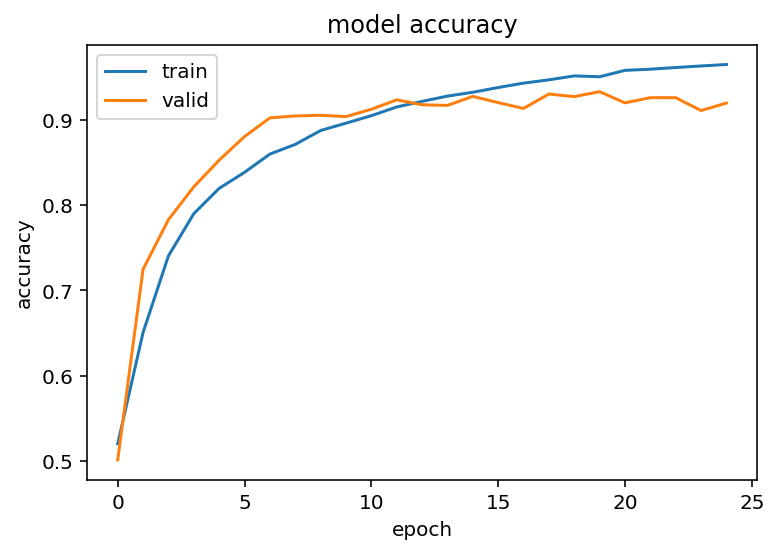

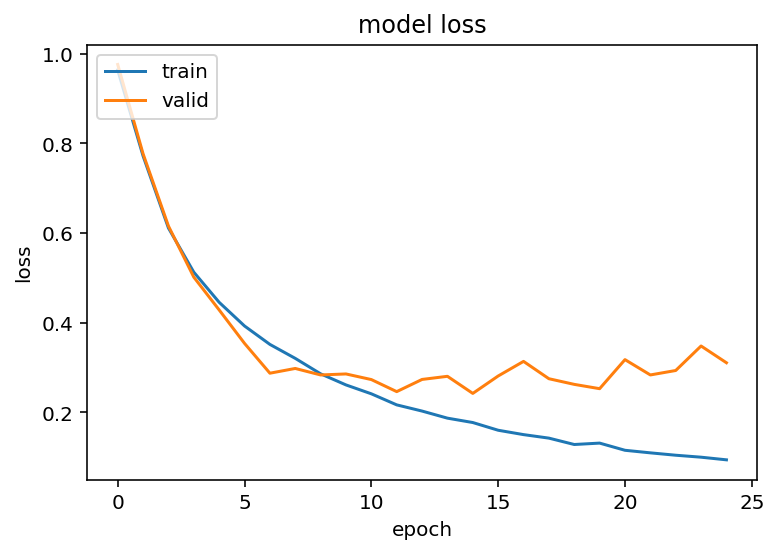

CPU times: user 10min 52s, sys: 31.9 s, total: 11min 23s
Wall time: 14min 28s


In [ ]:
%%time
np.set_printoptions(edgeitems=50000)
np.core.arrayprint._line_width = 50000
lstm = basic_LSTM()
train_model(lstm, "Word2Vec_LSTM", w2v_sm_X_train_df, w2v_X_test_df, w2v_sm_y_train_df, w2v_y_test_df)
del lstm

Build model...
Using GPU
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 64)           1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66560     
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 1,346,947
Trainable params: 1,346,947
Non-trainable params: 0
_________________________________________________________________
(39714, 300) (39714, 3)
(3724, 300) (3724, 3)
Epoch 1/100
559/559 [==============================] - 25s 35ms/step - loss: 0.8408 - acc: 0.6117 - val_loss: 0.9117 - val_acc: 0.5453

Epoch 00001: val_acc improved from -inf to 0.54532, saving model to D:\Data\Oluwafemi\Word2Vec_biLSTM.h5
Epoch 2/100
559/559 [==============================] - 19s 34ms/

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


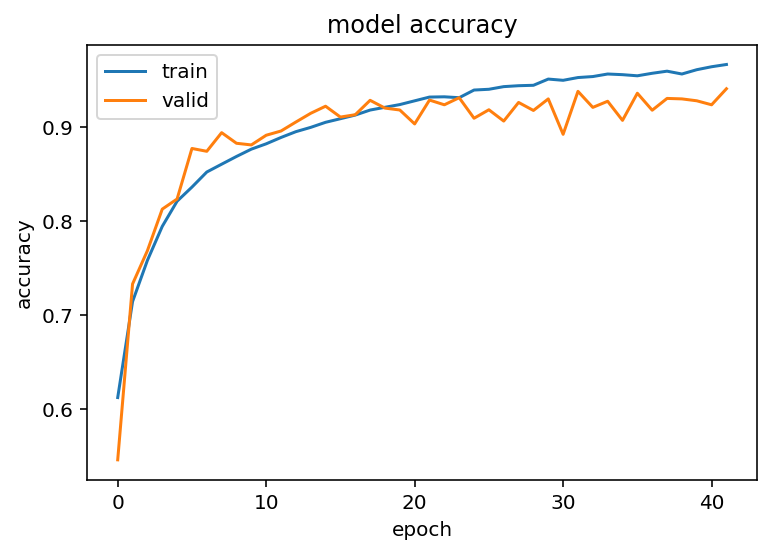

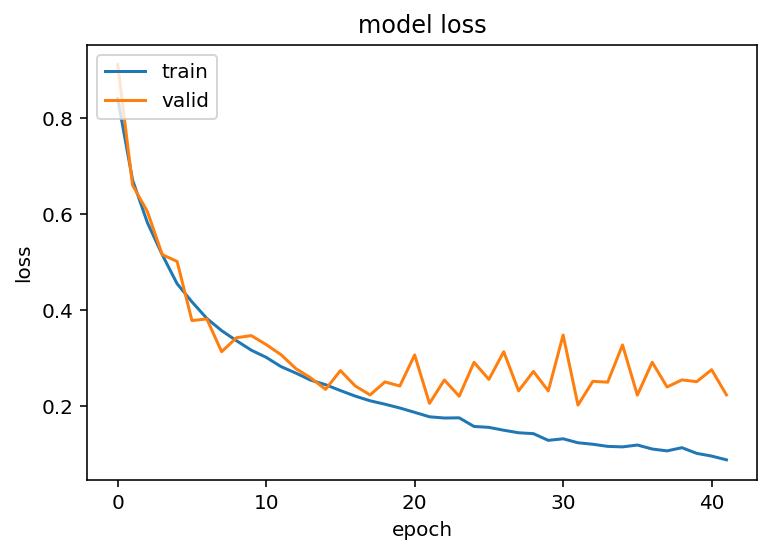

CPU times: user 15min 1s, sys: 43.6 s, total: 15min 45s
Wall time: 14min 26s


In [ ]:
%%time
bilstm = bi_LSTM(w2v_sm_X_train)
train_model(bilstm, 'Word2Vec_biLSTM', w2v_sm_X_train_df, w2v_X_test_df, w2v_sm_y_train_df, w2v_y_test_df)
del bilstm

Build model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 128)          2560000   
_________________________________________________________________
conv1d (Conv1D)              (None, 296, 128)          82048     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 74, 128)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 2,774,019
Trainable params: 2,774,019
Non-trainable params: 0
_________________________________________________________________
(39714, 300) (39714, 3)
(3724, 300) (3724, 3)
Epoch 1/100
559/559 [==============================

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


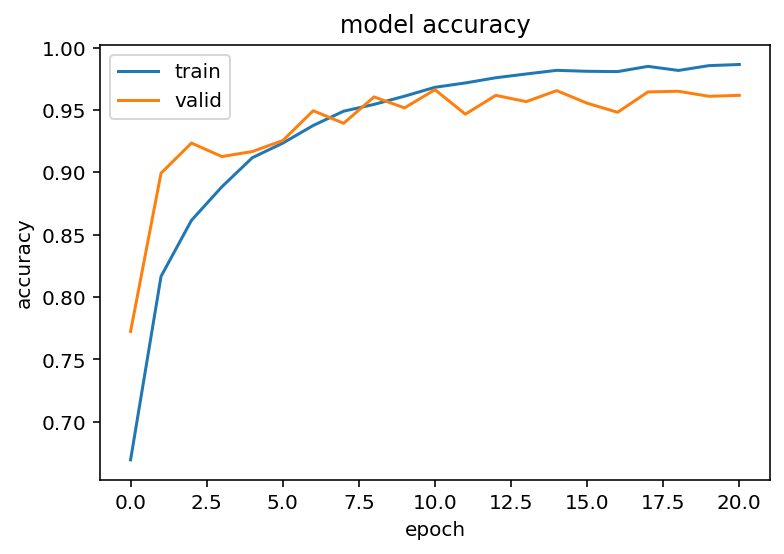

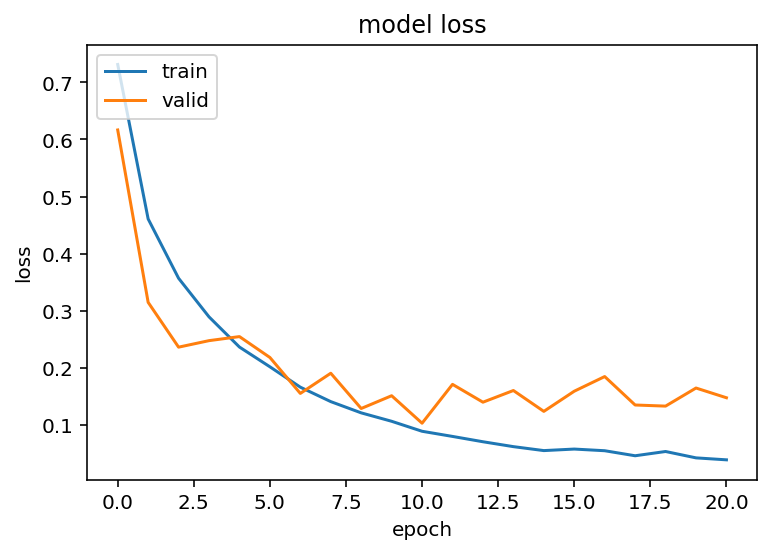

CPU times: user 9min 17s, sys: 25.4 s, total: 9min 43s
Wall time: 8min 25s


In [ ]:
%%time
cnn_LSTM_model = CNN_LSTM(w2v_sm_X_train_df)
train_model(cnn_LSTM_model, 'Word2Vec_CNN_LSTM', w2v_sm_X_train_df, w2v_X_test_df, w2v_sm_y_train_df, w2v_y_test_df)
del cnn_LSTM_model

**GloVE**

In [ ]:
!wget http://nlp.stanford.edu/data/glove.twitter.27B.zip
!unzip -q glove.twitter.27B.zip 

--2021-08-11 10:16:50--  http://nlp.stanford.edu/data/glove.twitter.27B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.twitter.27B.zip [following]
--2021-08-11 10:16:50--  https://nlp.stanford.edu/data/glove.twitter.27B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip [following]
--2021-08-11 10:16:51--  http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1520408563 (1.4G) [appli

In [ ]:
!ls
!pwd

Fast_N-Gram.csv		    glove.twitter.27B.25d.txt  sample_data
glove.twitter.27B.100d.txt  glove.twitter.27B.50d.txt
glove.twitter.27B.200d.txt  glove.twitter.27B.zip
/content


In [ ]:
sm = SMOTE()
MAX_SEQUENCE_LENGTH = 20000
NO_CLASSES = 3
# convert tables to one-hot-categories

token = Tokenizer()
token.fit_on_texts(Xtrain)
seq = token.texts_to_sequences(Xtrain)
vocab_size = len(token.word_index)+1
pad_seq_glove = pad_sequences(seq,maxlen=MAX_SEQUENCE_LENGTH)
pad_seq_G, y_t = sm.fit_sample(pad_seq_glove, Ytrain)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
token1 =Tokenizer()
token1.fit_on_texts(Xtest)
seq1 = token1.texts_to_sequences(Xtest)
pad_seq_glove_test = pad_sequences(seq1,maxlen=MAX_SEQUENCE_LENGTH)

In [ ]:
from tensorflow import keras

In [ ]:
embedding_dim = 50
embedding_vector = {}
f = open('glove.twitter.27B.50d.txt', encoding='utf-8')
for line in tqdm(f):
    value = line.split(' ')
    word = value[0]
    coef = np.array(value[1:],dtype = 'float32')
    embedding_vector[word] = coef

embedding_matrix = np.zeros((vocab_size,embedding_dim))
for word,i in tqdm(token.word_index.items()):
    embedding_value = embedding_vector.get(word)
    if embedding_value is not None:
        embedding_matrix[i] = embedding_value

1193514it [00:21, 56293.37it/s]
100%|██████████| 24593/24593 [00:00<00:00, 522678.08it/s]


In [ ]:
X_glove_test, Y_glove_test = pad_seq_glove_test.copy(), Ytest.copy()

X_glove_train_df = pd.DataFrame(pad_seq_G)

X_glove_test_df = pd.DataFrame(X_glove_test)

y_train1 = pd.get_dummies(y_t).values  # Convert categorical variable into dummy/indicator variables.

y_test1 = pd.get_dummies(Y_glove_test).values  # Convert categorical variable into dummy/indicator variables.

**LSTM**

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.initializers import Constant
batch_size = 32
nb_epochs = 5
embed_dim = 50
NO_CLASSES = 3
MAX_NUM_WORDS = 20000


# def train_model(model, model_name, X, Y):
def train_model(model, model_name, X_g_train, X_g_test, g_y_train, g_y_test):
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001)
    mc = ModelCheckpoint('D:\\Data\\Oluwafemi\\'+model_name+'.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

    X = X_g_train.copy()
    Y = g_y_train.copy()
    X_test = X_g_test.copy()
    Y_test = g_y_test.copy()

    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1, random_state=0)

    print(X_train.shape, Y_train.shape)
    print(X_val.shape, Y_val.shape)
    print(X_test.shape, Y_test.shape)

    # Fit the model
    estimator = model.fit(X_train, Y_train,
                          batch_size=batch_size,
                          shuffle=True,
                          epochs=nb_epochs,
                          verbose=1,
                          validation_data=(X_val, Y_val),
                          callbacks=[es, mc])

    scores = model.evaluate(X_test, Y_test, verbose=1)
    print("Accuracy: %.2f%%" % (scores[1] * 100))

    output_test = model.predict(X_test)
    final_pred = np.argmax(output_test, axis=1)
    org_y_label = [np.where(r == 1)[0][0] for r in Y_test]

    print('')
    # print(org_y_label)
    results = confusion_matrix(org_y_label, final_pred)
    print(results)

    # Compute precision, recall, F-measure and support for each class
    #  average='macro'
    #  Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
    #  The support is the number of occurrences of each class in y_true.

    precisions, recall, f1_score, true_sum = metrics.precision_recall_fscore_support(org_y_label, final_pred,
                                                                                     average='macro')

    print('')
    print('Classify NN Precision = %0.3f (STD +/- %0.2f)' % (np.mean(precisions), np.std(precisions) * 2))
    print('Classify NN Recall    = %0.3f (STD +/- %0.2f)' % (np.mean(recall), np.std(recall) * 2))
    print('Classify NN F1 Score  = %0.3f (STD +/- %0.2f)' % (np.mean(f1_score), np.std(f1_score) * 2))
    print('Classify NN y_true    = ', true_sum)

    pred_indices = np.argmax(output_test, axis=1)
    classes = np.array(range(0, NO_CLASSES))
    preds = classes[pred_indices]

    print('')
    print('Log loss: {}'.format(log_loss(classes[np.argmax(Y_test, axis=1)], output_test)))
    print('Accuracy: {}'.format(accuracy_score(classes[np.argmax(Y_test, axis=1)], preds)))

    # summarize history for accuracy
    plt.plot(estimator.history['acc'])
    plt.plot(estimator.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(estimator.history['loss'])
    plt.plot(estimator.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()


def LSTM():
    model = Sequential()
    model.add(Embedding(vocab_size,
                    embed_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=MAX_SEQUENCE_LENGTH,
                    trainable=True))
    model.add(CuDNNLSTM(128))
    model.add(Dense(units=NO_CLASSES, activation='softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['acc'])
    model.summary()
    return model

LSTM_model = LSTM()
train_model(LSTM_model,'Glove_LSTM', X_glove_train_df, X_glove_test_df, y_train1, y_test1)

NameError: ignored

**DOC2VEC**

In [ ]:
from gensim.models import Doc2Vec
from sklearn import utils
from gensim.models.doc2vec import TaggedDocument

In [ ]:
# https://github.com/tthustla/twitter_sentiment_analysis_part6/blob/master/Capstone_part4-Copy4.ipynb

def labelize_tweets_ug(tweets,label):
    result = []
    prefix = label
    for i, t in zip(tweets.index, tweets):
        result.append(TaggedDocument(t, [prefix + '_%s' % i]))
    return result

In [ ]:
all_x_w2v = labelize_tweets_ug(fast1, 'all')

In [ ]:
def d2v_train_model(model, all_x_w2v, location):
    '''
    According to the developer Radim ÃÂÃÂÃÂÃÂehÃÂÃÂÃÂÃÂ¯ÃÂÃÂÃÂÃÂek who created Gensim, "One caveat of the way this algorithm runs is that, 
    since the learning rate decrease over the course of iterating over the data, labels which are only seen in a single 
    LabeledSentence during training will only be trained with a fixed learning rate. This frequently produces less than optimal results."

    Below iteration implement explicit multiple-pass, alpha-reduction approach with added shuffling. 
    This has been already presented in Gensim's IMDB tutorial.
    '''
    model.build_vocab([x for x in all_x_w2v])
    
    print('Implement explicit multiple-pass, alpha-reduction approach with added shuffling')
    for epoch in range(30):
        model.train(utils.shuffle([x for x in all_x_w2v]), total_examples=len(all_x_w2v), epochs=1)
        model.alpha -= 0.002            # decrease the learning rate
        model.min_alpha = model.alpha   # fix the learning rate, no decay
        
    model.save(location)

    print(model)
    print(model.epochs)
    
    return model

In [ ]:
location = 'drive\\My Drive\\d2v_model_ug_dbow.model'
if os.path.exists(location):
    print('Found and load: {}'.format(location))
    model_dbow1 = Doc2Vec.load(location)
    model_dbow1.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
else:
    print('{} not found. training model'.format(location)) 
    model_dbow1 = Doc2Vec(dm=0, vector_size=300, negative=20, workers=8) #dbow =0 works like skipgram
    model_dbow1 = d2v_train_model(model_dbow1, all_x_w2v, location)

drive\My Drive\d2v_model_ug_dbow.model not found. training model
Implement explicit multiple-pass, alpha-reduction approach with added shuffling
Doc2Vec(dbow,d300,n20,mc5,s0.001,t8)
1


In [ ]:
#from: https://github.com/tthustla/twitter_sentiment_analysis_part6/blob/master/Capstone_part4-Copy4.ipynb
def get_vectors(model, corpus, size):
    vecs = np.zeros((len(corpus), size))
    n = 0
    for i in corpus.index:
        prefix = 'all_' + str(i)        
        vecs[n] = model.docvecs[prefix] # just get the vectors for index=1 (no need for the corpus)
        n += 1
    return vecs

In [ ]:
all_vecs_d2v = get_vectors(model_dbow1, pd.DataFrame(fast1), 300)
print(all_vecs_d2v.shape)

(15060, 300)


In [ ]:
len(y1)

15060

In [ ]:
d2v_X_train, d2v_X_test, d2v_y_train, d2v_y_test = train_test_split(all_vecs_d2v, y1, test_size=0.25, random_state=0)

In [ ]:
def get_min_value_train():
    min_values1 = []
    for i in range(0, len(d2v_X_train)):
        min_value1 = min(d2v_X_train[i])
        min_values1.append(min_value1)

    return min(min_values1)

a_train1 = get_min_value_train()
a_train_Abs1 = abs(a_train1)
a_train_trans1 = d2v_X_train + a_train_Abs1
len(a_train_trans1)

11295

In [ ]:
def get_min_value_test():
    min_values1 = []
    for i in range(0, len(d2v_X_test)):
        min_value1 = min(d2v_X_test[i])
        min_values1.append(min_value1)

    return min(min_values1)

a_test1 = get_min_value_test()
a_test_Abs1 = abs(a_test1)
a_test_trans1 = d2v_X_test + a_test_Abs1
len(a_test_trans1)

3765

In [ ]:
sm = SMOTE()

d2v_sm_X_train, d2v_sm_y_train = sm.fit_sample(a_train_trans1, d2v_y_train)
d2v_X_test, d2v_y_test = a_test_trans1.copy(), d2v_y_test.copy()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
c = collections.Counter(d2v_y_train)
c

Counter({1: 10747, 2: 329, 3: 219})

In [ ]:
c = collections.Counter(d2v_y_test)
c

Counter({1: 3576, 2: 104, 3: 85})